### Graph Name: Distribution of Cycle Lengths (Max Matching)
### Description:
This graph gives the distribution of cycle sizes and analyses it's functional form as n $\to \infty$.


#### Simulation Code: 
Should only run this if you want to generate new data. Otherwise, skip to the next section to load the data. If you do, just uncomment section below. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.chdir('..')
from funcs import *
from multi_funcs import *

In [3]:
results = gs_f_simulate_nx_max_lengths(10000, 1000, 3)
df = make_df_max_match_length_single(1000, 3, results, True, f'data/simulations/max_length_matches/')

### Graphing Code

In [4]:
os.chdir(r'C:\Users\v-kirdwivedi\Documents\GitHub\MatchingAlgorithm')

In [22]:
def prep(k):
    df = pd.read_csv(f'data/simulations/max_length_matches/n_1000_k_{k}_max_length_diff.csv')
    df = df.sort_values(by=['cycle_lengths']).reset_index(drop=True)
    df = df.iloc[:-10, :]
    nbins = 5*k
    if k == 3:
        nbins = 10
    df['binned'] = pd.cut(df['cycle_lengths'], bins = nbins)
    df['binned'] = df["binned"].apply(lambda x: x.mid)
    grouped = df.groupby('binned').size()/len(df)
    x = pd.DataFrame(grouped).reset_index(drop=False)
    x['log'] = np.log(x[0])
    return x

In [23]:
from scipy import stats

Text(0.5, 0, 'Cycle Lengths')

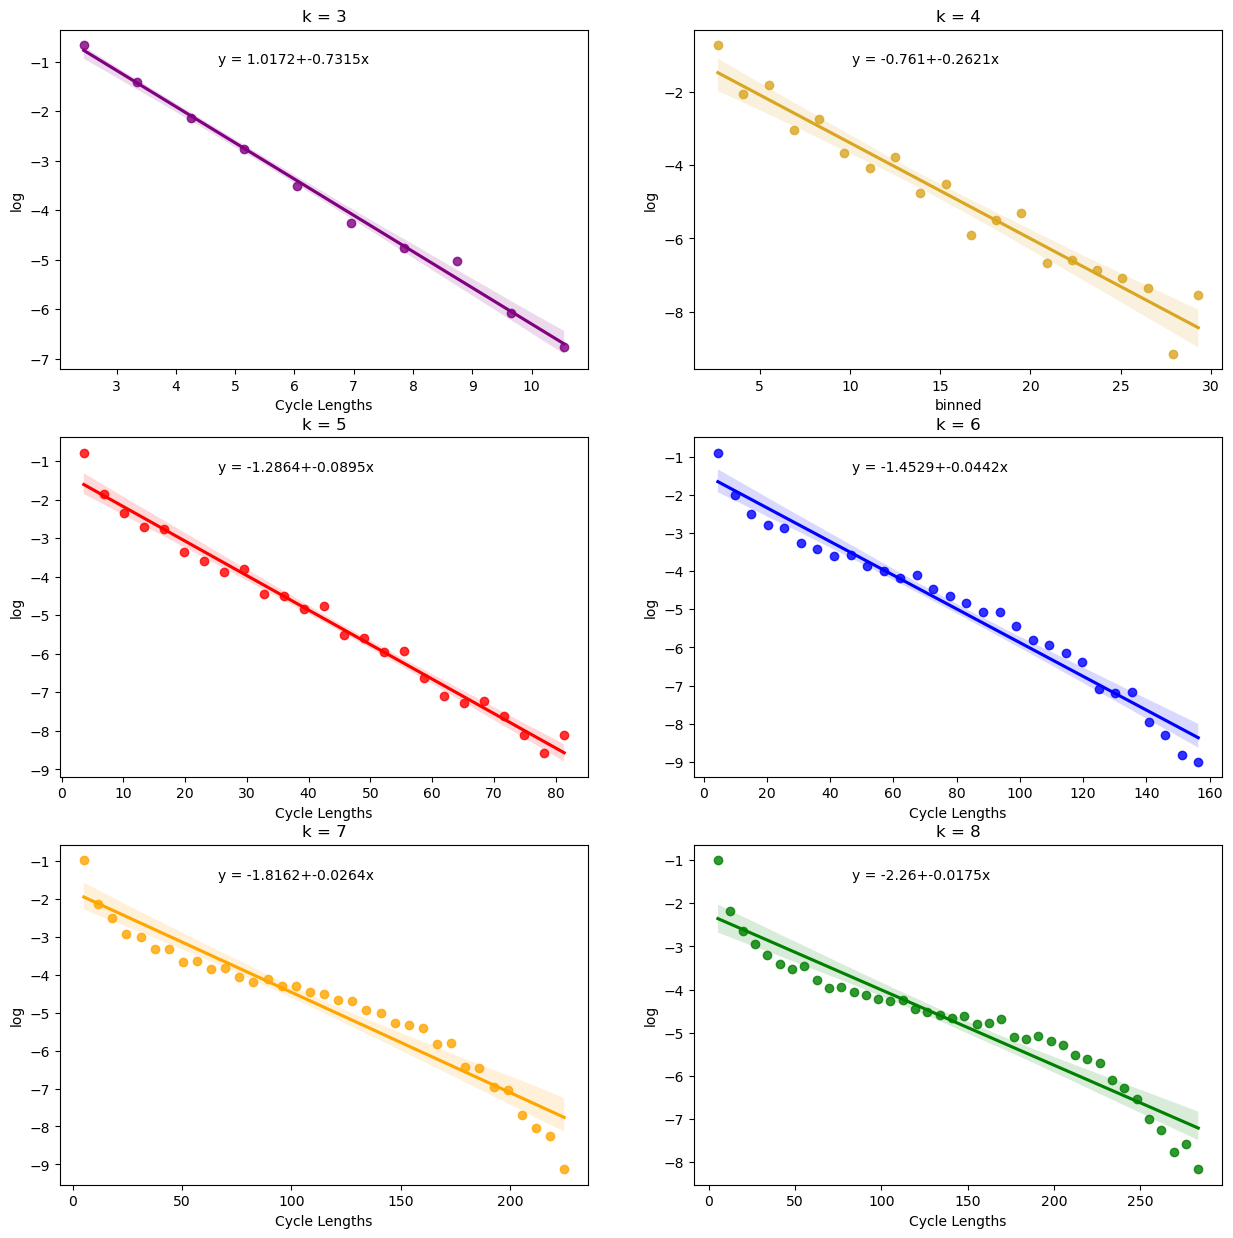

In [26]:
fig, ax = plt.subplots(3, 2, figsize=(15, 15))

df = prep(3)
sns.regplot(x='binned', y='log', data=df, ax=ax[0, 0], color='purple')
res1 = stats.linregress(x=df['binned'], y=df['log'])
ax[0, 0].text(0.3, 0.9, 'y = ' + str(round(res1.intercept, 4))+'+'+str(round(res1.slope,4))+'x', transform=ax[0,0].transAxes)
ax[0,0].set_title('k = 3')
ax[0,0].set_xlabel('Cycle Lengths')

df = prep(4)
sns.regplot(x='binned', y='log', data=prep(4), ax=ax[0, 1], color = 'goldenrod')
res2 = stats.linregress(x=df['binned'], y=df['log'])
ax[0, 1].text(0.3, 0.9, 'y = ' + str(round(res2.intercept, 4))+'+'+str(round(res2.slope,4))+'x', transform=ax[0,1].transAxes)
ax[0,1].set_title('k = 4')

df = prep(5)
sns.regplot(x='binned', y='log', data=df, ax=ax[1, 0], color='red')
res1 = stats.linregress(x=df['binned'], y=df['log'])
ax[1, 0].text(0.3, 0.9, 'y = ' + str(round(res1.intercept, 4))+'+'+str(round(res1.slope,4))+'x', transform=ax[1,0].transAxes)
ax[1,0].set_title('k = 5')
ax[1,0].set_xlabel('Cycle Lengths')


df = prep(6)
sns.regplot(x='binned', y='log', data=prep(6), ax=ax[1, 1], color = 'blue')
res2 = stats.linregress(x=df['binned'], y=df['log'])
ax[1, 1].text(0.3, 0.9, 'y = ' + str(round(res2.intercept, 4))+'+'+str(round(res2.slope,4))+'x', transform=ax[1,1].transAxes)
ax[1,1].set_title('k = 6')
ax[1,1].set_xlabel('Cycle Lengths')

df = prep(7)
sns.regplot(x='binned', y='log', data=prep(7), ax=ax[2, 0], color = 'orange')
res3 = stats.linregress(x=df['binned'], y=df['log'])
ax[2, 0].text(0.3, 0.9, 'y = ' + str(round(res3.intercept, 4))+'+'+str(round(res3.slope,4))+'x', transform=ax[2,0].transAxes)
ax[2,0].set_title('k = 7')
ax[2,0].set_xlabel('Cycle Lengths')

df = prep(8)
sns.regplot(x='binned', y='log', data=prep(8), ax=ax[2, 1], color= 'green')
res4 = stats.linregress(x=df['binned'], y=df['log'])
ax[2, 1].text(0.3, 0.9, 'y = ' + str(round(res4.intercept, 4))+'+'+str(round(res4.slope,4))+'x', transform=ax[2,1].transAxes)
ax[2,1].set_title('k = 8')
ax[2,1].set_xlabel('Cycle Lengths')